In [46]:
import pandas as pd
import numpy as np

In [47]:
df=pd.read_csv("loan_data.csv")
df.head()

,index,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [48]:
df.describe()

,index,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,7142.000000,7142.0,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000
mean,3570.500000,1.0,0.118893,322.145983,10.940248,12.226284,717.486558,4680.092306,13815.138897,45.099317,1.003500,0.146318,0.054467,0.132036
std,2061.862144,0.0,0.025354,203.377280,0.584524,6.623605,36.921108,2430.833979,17017.890818,28.964236,1.154311,0.476899,0.235432,0.338553
min,0.000000,1.0,0.060000,15.690000,8.294050,0.000000,627.000000,1110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1785.250000,1.0,0.096400,165.820000,10.596141,7.070000,687.000000,2970.000000,3295.750000,20.600000,0.000000,0.000000,0.000000,0.000000
50%,3570.500000,1.0,0.119100,275.070000,10.933107,12.280000,712.000000,4229.958333,8635.000000,43.900000,1.000000,0.000000,0.000000,0.000000
75%,5355.750000,1.0,0.135700,440.972500,11.289782,17.447500,742.000000,5761.750000,17605.500000,68.600000,2.000000,0.000000,0.000000,0.000000
max,7141.000000,1.0,0.212100,918.020000,14.528354,29.420000,827.000000,16652.000000,149527.000000,99.800000,8.000000,6.000000,3.000000,1.000000


In [49]:
df = df.drop("index", axis=1)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7142 entries, 0 to 7141
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      7142 non-null   int64  
 1   purpose            7142 non-null   object 
 2   int.rate           7142 non-null   float64
 3   installment        7142 non-null   float64
 4   log.annual.inc     7142 non-null   float64
 5   dti                7142 non-null   float64
 6   fico               7142 non-null   int64  
 7   days.with.cr.line  7142 non-null   float64
 8   revol.bal          7142 non-null   int64  
 9   revol.util         7142 non-null   float64
 10  inq.last.6mths     7142 non-null   int64  
 11  delinq.2yrs        7142 non-null   int64  
 12  pub.rec            7142 non-null   int64  
 13  not.fully.paid     7142 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 781.3+ KB


credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [50]:
df.shape

(7142, 14)

In [51]:
df=pd.get_dummies(df, columns=['purpose'], drop_first=True)

In [52]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [93]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, roc_curve, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
from imblearn.over_sampling import SMOTE

In [95]:
X = df.drop('not.fully.paid', axis=1)   # Features
y = df['not.fully.paid']                # Target

In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [97]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [98]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [99]:
log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_model.fit(X_train_scaled, y_train_res)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [100]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [101]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

In [102]:
grid_rf = GridSearchCV(rf, param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=1)
grid_rf.fit(X_train_res, y_train_res)

rf_best = grid_rf.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [103]:
y_pred_log = log_model.predict(X_test_scaled)
y_pred_rf = rf_best.predict(X_test)

In [104]:
# 🧾 Evaluation
print("\n=== Logistic Regression Results ===")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test_scaled)[:,1]))

print("\n=== Random Forest (Tuned) Results ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf_best.predict_proba(X_test)[:,1]))


=== Logistic Regression Results ===
              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1860
           1       0.18      0.45      0.25       283

    accuracy                           0.65      2143
   macro avg       0.53      0.56      0.51      2143
weighted avg       0.80      0.65      0.70      2143

ROC-AUC: 0.5757418594931418

=== Random Forest (Tuned) Results ===
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1860
           1       0.18      0.14      0.16       283

    accuracy                           0.80      2143
   macro avg       0.53      0.52      0.52      2143
weighted avg       0.78      0.80      0.79      2143

ROC-AUC: 0.6094503970515598


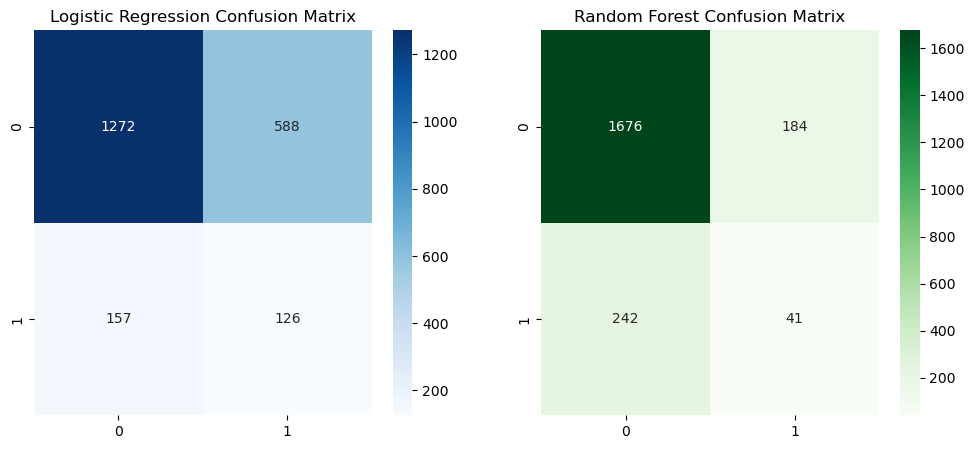

In [105]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Logistic Regression Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title("Random Forest Confusion Matrix")

plt.show()

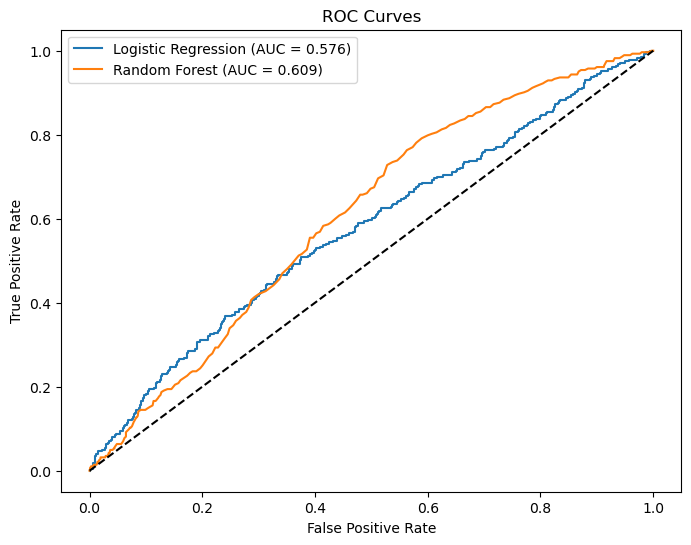

In [106]:
fpr_log, tpr_log, _ = roc_curve(y_test, log_model.predict_proba(X_test_scaled)[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_best.predict_proba(X_test)[:,1])

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label='Logistic Regression (AUC = %.3f)' % roc_auc_score(y_test, log_model.predict_proba(X_test_scaled)[:,1]))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %.3f)' % roc_auc_score(y_test, rf_best.predict_proba(X_test)[:,1]))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

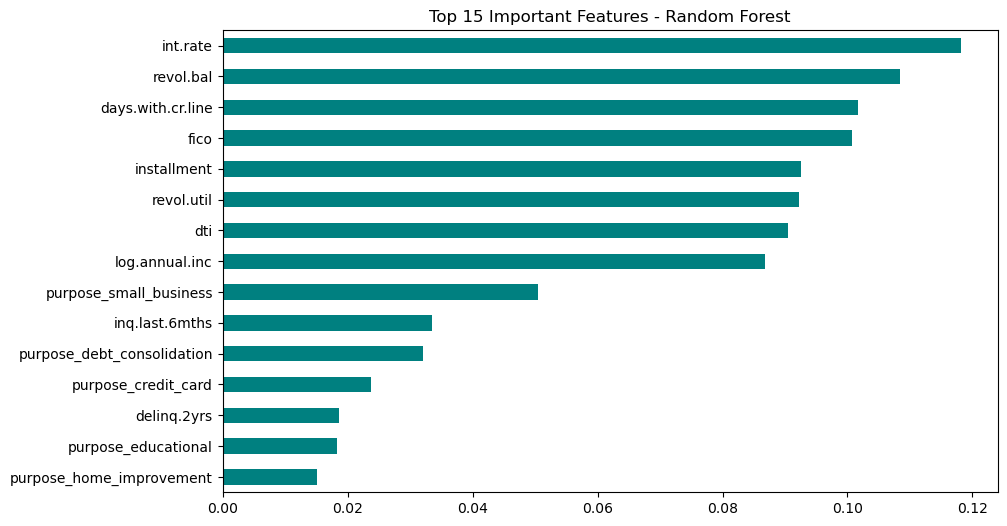

In [107]:
importances = pd.Series(rf_best.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
importances.head(15).plot(kind='barh', color='teal')
plt.title('Top 15 Important Features - Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [109]:
import joblib
joblib.dump(log_model, "logistic_model.pkl")
joblib.dump(rf_best, "random_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Models and Scaler saved successfully!")

✅ Models and Scaler saved successfully!
